In [1]:
import kaggle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import polars as pl

In [2]:
os.chdir(r"C:\Users\manub\Downloads")
df = pd.read_csv('thegurus-opendata-renfe-trips.csv')
df.head()

,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date
0,1,renfe,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,3.08,AVE,Preferente,68.95,Promo,NaN,{},2019-04-11 21:49:46
1,2,renfe,MADRID,BARCELONA,2019-04-18 13:25:00,2019-04-18 16:24:00,2.98,AVE-TGV,Turista,107.70,Flexible,NaN,{},2019-04-11 21:49:46
2,3,renfe,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,2.83,AVE,Turista,75.40,Promo,NaN,{},2019-04-11 21:49:46
3,4,renfe,MADRID,BARCELONA,2019-04-18 15:30:00,2019-04-18 18:40:00,3.17,AVE,Preferente,NaN,Promo,NaN,{},2019-04-11 21:49:46
4,5,renfe,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,2.50,AVE,Turista Plus,106.75,Promo,NaN,{},2019-04-11 21:49:46


In [3]:
df.dtypes

id                 int64
company           object
origin            object
destination       object
departure         object
arrival           object
duration         float64
vehicle_type      object
vehicle_class     object
price            float64
fare              object
seats            float64
meta              object
insert_date       object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38753060 entries, 0 to 38753059
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             int64  
 1   company        object 
 2   origin         object 
 3   destination    object 
 4   departure      object 
 5   arrival        object 
 6   duration       float64
 7   vehicle_type   object 
 8   vehicle_class  object 
 9   price          float64
 10  fare           object 
 11  seats          float64
 12  meta           object 
 13  insert_date    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 4.0+ GB


In [5]:
df.describe()

,id,duration,price,seats
count,3.875306e+07,3.875306e+07,2.959311e+07,1.247421e+06
mean,1.937653e+07,2.778496e+00,5.822162e+01,2.210353e+02
std,1.118704e+07,1.486362e+00,2.476530e+01,7.232385e+01
min,1.000000e+00,3.700000e-01,0.000000e+00,6.000000e+00
25%,9.688266e+06,1.800000e+00,3.920000e+01,2.050000e+02
50%,1.937653e+07,2.530000e+00,5.570000e+01,2.390000e+02
75%,2.906480e+07,2.980000e+00,7.540000e+01,2.620000e+02
max,3.875306e+07,1.242000e+01,3.428000e+02,3.340000e+02


In [6]:
df.isnull().sum()

id                      0
company                 0
origin                  0
destination             0
departure               0
arrival                 0
duration                0
vehicle_type            0
vehicle_class     8034239
price             9159949
fare              8034239
seats            37505639
meta                    0
insert_date             0
dtype: int64

In [7]:
df['departure'] = pd.to_datetime(df['departure'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['arrival'] = pd.to_datetime(df['arrival'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['insert_date'] = pd.to_datetime(df['insert_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [8]:
df.dtypes

id                        int64
company                  object
origin                   object
destination              object
departure        datetime64[ns]
arrival          datetime64[ns]
duration                float64
vehicle_type             object
vehicle_class            object
price                   float64
fare                     object
seats                   float64
meta                     object
insert_date      datetime64[ns]
dtype: object

In [9]:
df['Journey'] = df['origin'].astype(str) + " - " + df['destination'].astype(str)

In [10]:
median_price = df.groupby(['Journey','vehicle_class'])['price'].median().sort_values(ascending=False).reset_index()
median_price = median_price.rename(columns={'price': 'median_price'})
median_price['mapper'] = median_price['Journey'] + " - " + median_price['vehicle_class']
median_price = median_price.set_index('mapper')['median_price'].to_dict()

In [11]:
median_price

{'PONFERRADA - MADRID - Cama G. Clase': 150.6,
 'MADRID - GIRONA - Turista': 114.8,
 'GIRONA - MADRID - Turista': 114.8,
 'GIRONA - MADRID - Preferente': 114.1,
 'MADRID - BARCELONA - TuristaSólo plaza H': 107.7,
 'BARCELONA - MADRID - TuristaSólo plaza H': 107.7,
 'MADRID - GIRONA - Preferente': 104.45,
 'GIRONA - MADRID - Turista Plus': 103.3,
 'MADRID - PONFERRADA - Cama G. Clase': 98.7,
 'HUESCA - MADRID - Preferente': 98.3,
 'MADRID - BARCELONA - Preferente': 98.0,
 'BARCELONA - MADRID - Preferente': 98.0,
 'MADRID - MALAGA - Turista Plus': 97.5,
 'MADRID - GIRONA - Turista Plus': 96.4,
 'VALENCIA - MADRID - PreferenteSólo plaza H': 92.3,
 'MADRID - VALENCIA - PreferenteSólo plaza H': 92.3,
 'MADRID - LEON - Cama G. Clase': 91.9,
 'BARCELONA - MADRID - Turista Plus': 90.5,
 'MADRID - BARCELONA - Turista Plus': 90.5,
 'MADRID - CADIZ - Turista Plus': 90.2,
 'MADRID - SEVILLA - PreferenteSólo plaza H': 87.4,
 'SEVILLA - MADRID - PreferenteSólo plaza H': 87.4,
 'BARCELONA - MADRID - 

In [12]:
df['mapped_journey'] = df['Journey'] + " - " + df['vehicle_class']
df['price'] = df['price'].fillna(df['mapped_journey'].map(median_price))
df.head()

,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date,Journey,mapped_journey
0,1,renfe,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,3.08,AVE,Preferente,68.95,Promo,NaN,{},2019-04-11 21:49:46,MADRID - BARCELONA,MADRID - BARCELONA - Preferente
1,2,renfe,MADRID,BARCELONA,2019-04-18 13:25:00,2019-04-18 16:24:00,2.98,AVE-TGV,Turista,107.70,Flexible,NaN,{},2019-04-11 21:49:46,MADRID - BARCELONA,MADRID - BARCELONA - Turista
2,3,renfe,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,2.83,AVE,Turista,75.40,Promo,NaN,{},2019-04-11 21:49:46,MADRID - BARCELONA,MADRID - BARCELONA - Turista
3,4,renfe,MADRID,BARCELONA,2019-04-18 15:30:00,2019-04-18 18:40:00,3.17,AVE,Preferente,98.00,Promo,NaN,{},2019-04-11 21:49:46,MADRID - BARCELONA,MADRID - BARCELONA - Preferente
4,5,renfe,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,2.50,AVE,Turista Plus,106.75,Promo,NaN,{},2019-04-11 21:49:46,MADRID - BARCELONA,MADRID - BARCELONA - Turista Plus


In [13]:
df.isnull().sum()

id                       0
company                  0
origin                   0
destination              0
departure                0
arrival                  0
duration                 0
vehicle_type             0
vehicle_class      8034239
price              8034239
fare               8034239
seats             37505639
meta                     0
insert_date          12174
Journey                  0
mapped_journey     8034239
dtype: int64

In [14]:
clean_df = df.dropna(subset=['price'])
clean_df.head()

,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date,Journey,mapped_journey
0,1,renfe,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,3.08,AVE,Preferente,68.95,Promo,NaN,{},2019-04-11 21:49:46,MADRID - BARCELONA,MADRID - BARCELONA - Preferente
1,2,renfe,MADRID,BARCELONA,2019-04-18 13:25:00,2019-04-18 16:24:00,2.98,AVE-TGV,Turista,107.70,Flexible,NaN,{},2019-04-11 21:49:46,MADRID - BARCELONA,MADRID - BARCELONA - Turista
2,3,renfe,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,2.83,AVE,Turista,75.40,Promo,NaN,{},2019-04-11 21:49:46,MADRID - BARCELONA,MADRID - BARCELONA - Turista
3,4,renfe,MADRID,BARCELONA,2019-04-18 15:30:00,2019-04-18 18:40:00,3.17,AVE,Preferente,98.00,Promo,NaN,{},2019-04-11 21:49:46,MADRID - BARCELONA,MADRID - BARCELONA - Preferente
4,5,renfe,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,2.50,AVE,Turista Plus,106.75,Promo,NaN,{},2019-04-11 21:49:46,MADRID - BARCELONA,MADRID - BARCELONA - Turista Plus


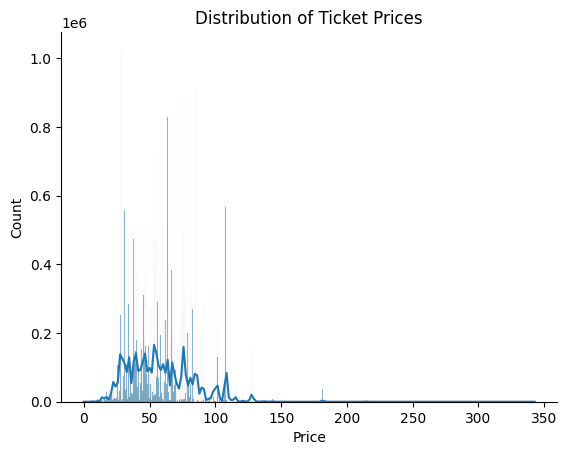

In [15]:
sns.histplot(clean_df['price'], kde=True)
plt.xlabel('Price')
plt.title('Distribution of Ticket Prices')
sns.despine()
plt.show()

In [16]:
pd.crosstab(clean_df['vehicle_class'], clean_df['Journey'],values = clean_df['price'], aggfunc='median').dropna(how='all')

Journey,ALBACETE - MADRID,ALICANTE - MADRID,BARCELONA - MADRID,BARCELONA - VALENCIA,BARCELONA - ZARAGOZA,CADIZ - MADRID,CASTELLO - MADRID,CASTELLON - MADRID,CIUDAD REAL - MADRID,CORDOBA - MADRID,...,SEGOVIA - MADRID,SEVILLA - MADRID,TARRAGONA - MADRID,TOLEDO - MADRID,VALENCIA - BARCELONA,VALENCIA - MADRID,VALLADOLID - MADRID,ZAMORA - MADRID,ZARAGOZA - BARCELONA,ZARAGOZA - MADRID
vehicle_class,,,,,,,,,,,,,,,,,,,,,
Cama G. Clase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cama Turista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,57.60,NaN,NaN,NaN
Preferente,35.45,50.10,98.0,NaN,NaN,52.75,NaN,68.05,33.8,72.60,...,32.0,69.40,75.20,NaN,NaN,66.55,49.10,32.15,NaN,50.70
PreferenteSólo plaza H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,87.40,NaN,NaN,NaN,92.30,NaN,NaN,NaN,NaN
Turista,31.85,46.40,85.1,28.50,45.70,59.35,74.8,37.55,29.6,63.40,...,13.9,53.40,82.60,13.9,28.50,34.00,31.10,24.80,45.7,46.80
Turista - Turista Plus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.25
Turista Plus,28.45,59.65,90.5,40.45,32.85,NaN,67.3,NaN,36.0,51.00,...,NaN,58.95,69.45,NaN,40.45,25.75,29.45,NaN,48.9,46.75
Turista Plus - Turista,NaN,NaN,46.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,43.55,NaN,NaN,NaN,NaN,NaN,NaN,32.50
Turista PlusSólo plaza H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,80.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


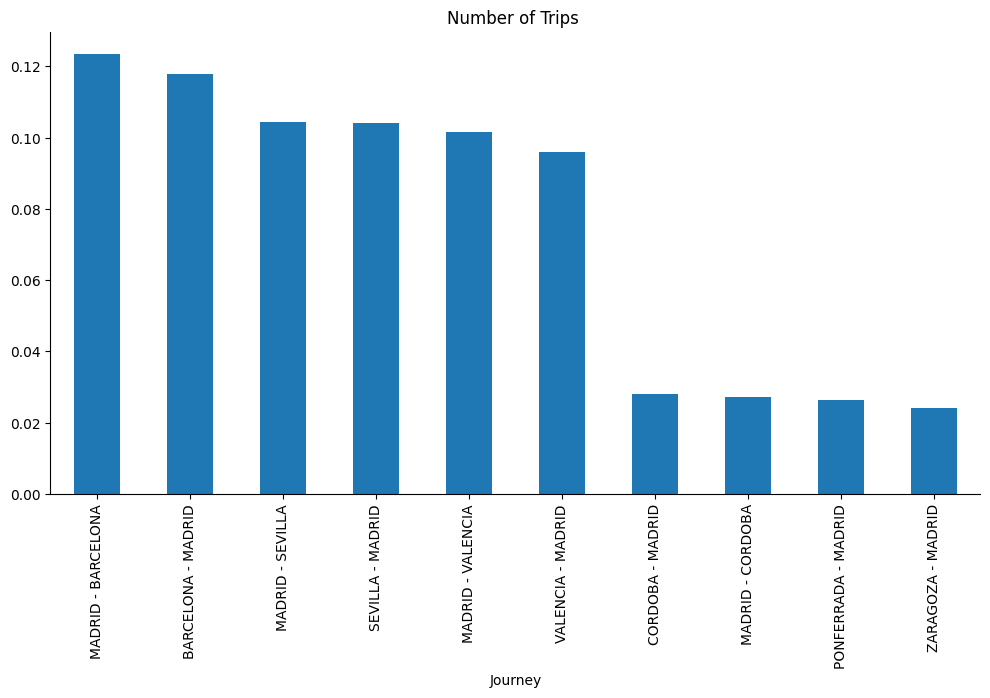

In [17]:
clean_df['Journey'].value_counts(normalize = True).sort_values(ascending = False).head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Number of Trips ')
sns.despine()

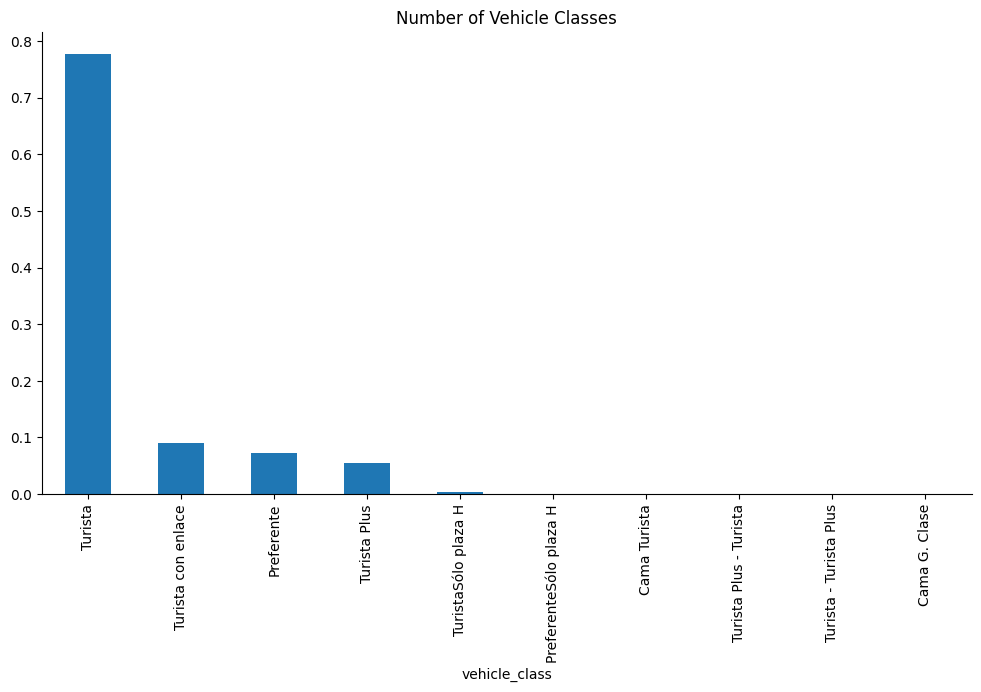

In [18]:
clean_df['vehicle_class'].value_counts(normalize = True).sort_values(ascending = False).head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Number of Vehicle Classes')
sns.despine()

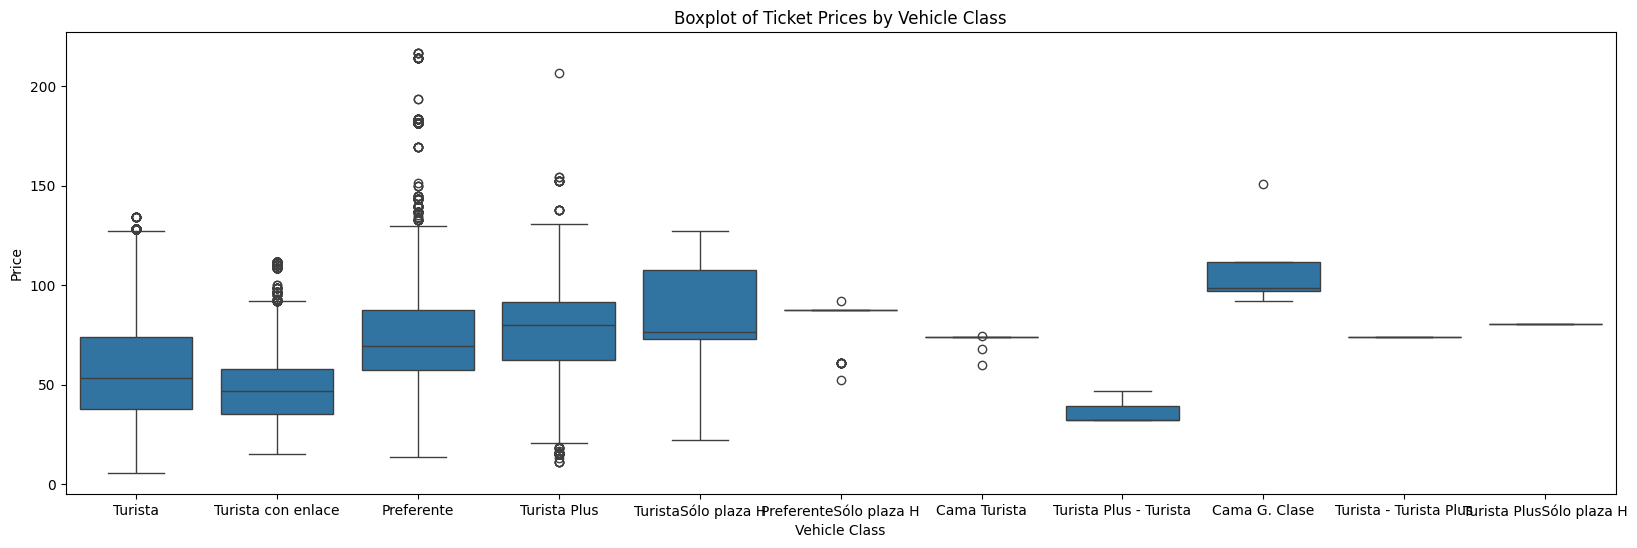

In [19]:
# Sample a subset to avoid MemoryError
sample_df = clean_df.sample(n=100000, random_state=42)  # adjust n as needed

plt.figure(figsize=(20, 6))
sns.boxplot(x='vehicle_class', y='price', data=sample_df)
plt.title('Boxplot of Ticket Prices by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Price')
plt.show()

In [20]:
clean_df['company'].unique()

array(['renfe'], dtype=object)

In [21]:
clean_df['hours'] = (clean_df['arrival'] - clean_df['departure']).dt.total_seconds() / 3600
clean_df[['departure', 'arrival', 'hours']].head()

C:\Users\manub\AppData\Local\Temp\ipykernel_23012\583711249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['hours'] = (clean_df['arrival'] - clean_df['departure']).dt.total_seconds() / 3600


,departure,arrival,hours
0,2019-04-18 05:50:00,2019-04-18 08:55:00,3.083333
1,2019-04-18 13:25:00,2019-04-18 16:24:00,2.983333
2,2019-04-18 06:30:00,2019-04-18 09:20:00,2.833333
3,2019-04-18 15:30:00,2019-04-18 18:40:00,3.166667
4,2019-04-18 07:00:00,2019-04-18 09:30:00,2.500000


In [22]:
clean_df.dtypes

id                         int64
company                   object
origin                    object
destination               object
departure         datetime64[ns]
arrival           datetime64[ns]
duration                 float64
vehicle_type              object
vehicle_class             object
price                    float64
fare                      object
seats                    float64
meta                      object
insert_date       datetime64[ns]
Journey                   object
mapped_journey            object
hours                    float64
dtype: object

In [23]:
clean_df['vehicle_class'].unique()

array(['Preferente', 'Turista', 'Turista Plus', 'Turista con enlace',
       'Cama Turista', 'Cama G. Clase', 'TuristaSólo plaza H',
       'PreferenteSólo plaza H', 'Turista PlusSólo plaza H',
       'Turista - Turista Plus', 'Turista Plus - Turista'], dtype=object)

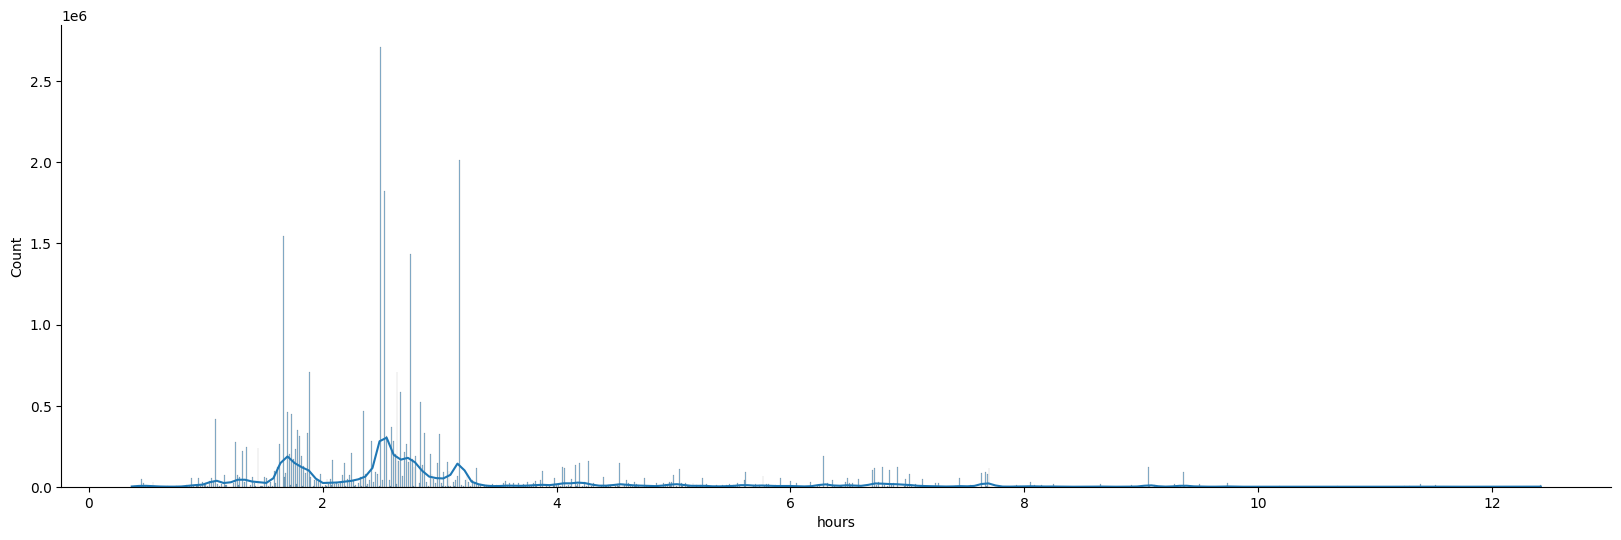

In [24]:
plt.figure(figsize=(20, 6))
sns.histplot(clean_df['hours'], kde=True)
sns.despine()

<Axes: xlabel='departure', ylabel='Count'>

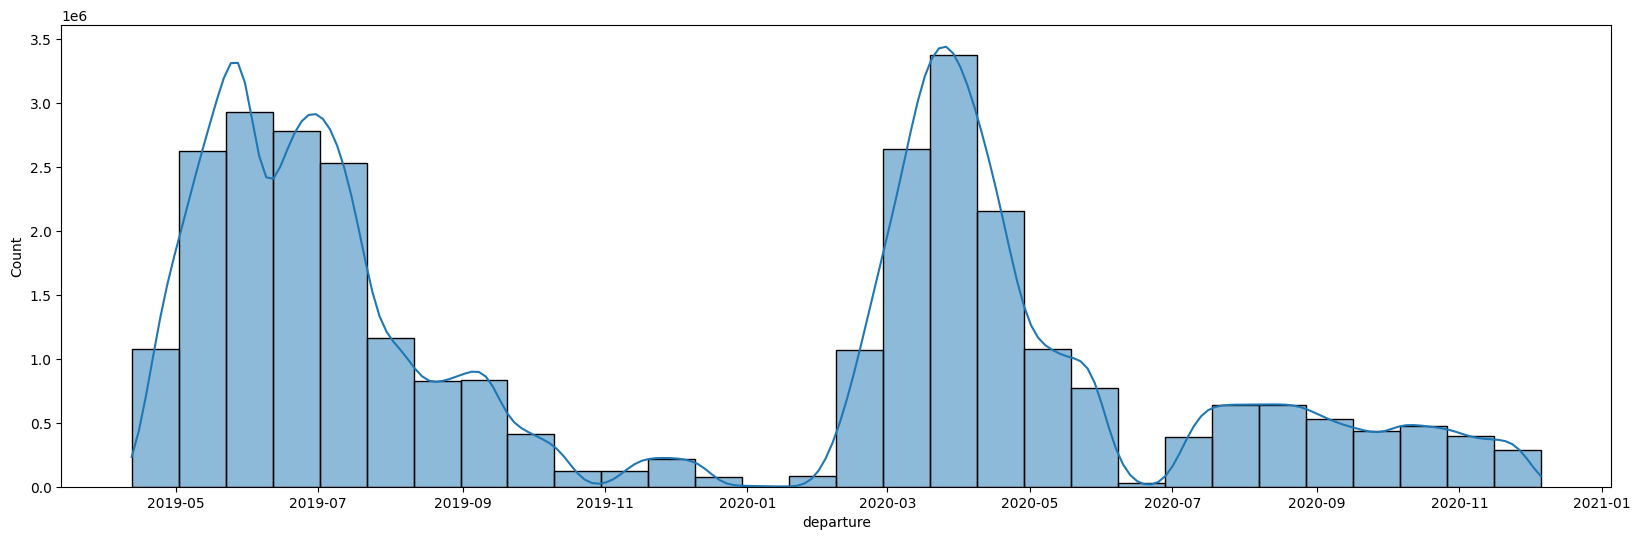

In [25]:
plt.figure(figsize=(20, 6))
sns.histplot(clean_df['departure'], kde=True, bins=30)

In [26]:
clean_df['Dep_Month'] = clean_df['departure'].dt.month
clean_df['Dep_Day'] = clean_df['departure'].dt.day
clean_df['Dep_Year'] = clean_df['departure'].dt.year
clean_df['Dep_weekday'] = clean_df['departure'].dt.weekday

C:\Users\manub\AppData\Local\Temp\ipykernel_23012\422770954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Dep_Month'] = clean_df['departure'].dt.month
C:\Users\manub\AppData\Local\Temp\ipykernel_23012\422770954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Dep_Day'] = clean_df['departure'].dt.day
C:\Users\manub\AppData\Local\Temp\ipykernel_23012\422770954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [27]:
month = clean_df['Dep_Month'].value_counts().reset_index()

In [28]:
month

,Dep_Month,count
0,5,6055161
1,3,4682853
2,4,4461798
3,7,4112636
4,6,3980609
5,8,2365894
6,9,1739566
7,2,1318583
8,10,1016410
9,11,790337


C:\Users\manub\AppData\Local\Temp\ipykernel_23012\3715656680.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dep_Month', y='count', data=month, palette='viridis')
C:\Users\manub\AppData\Local\Temp\ipykernel_23012\3715656680.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dep_Month', y='count', data=month, palette='viridis', ax=axes[0])


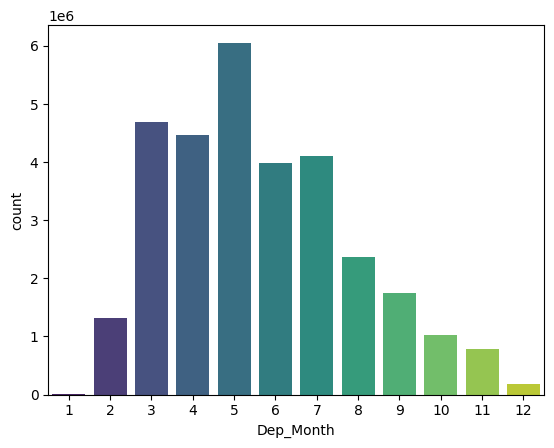

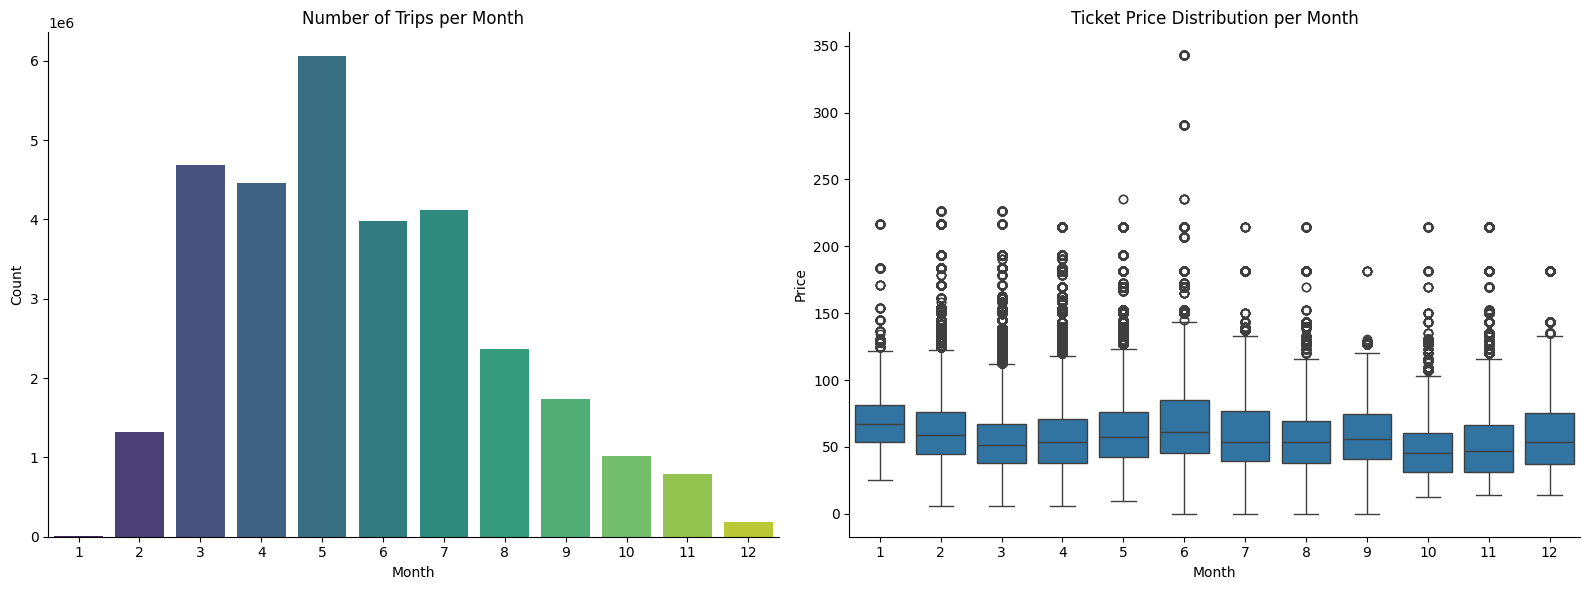

In [29]:
sns.barplot(x='Dep_Month', y='count', data=month, palette='viridis')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot: Month vs Count
sns.barplot(x='Dep_Month', y='count', data=month, palette='viridis', ax=axes[0])
axes[0].set_title('Number of Trips per Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

# Boxplot: Month vs Price
sns.boxplot(x='Dep_Month', y='price', data=clean_df, ax=axes[1])
axes[1].set_title('Ticket Price Distribution per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Price')

sns.despine()
plt.tight_layout()
plt.show()

In [30]:
# Barplot: Month vs Count
sns.barplot(x='Dep_Month', y='count', data=month, palette='viridis', ax=axes[0])
axes[0].set_title('Number of Trips per Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

# Boxplot: Month vs Price
sns.boxplot(x='Dep_Month', y='price', data=clean_df, ax=axes[1])
axes[1].set_title('Ticket Price Distribution per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Price')

sns.despine()
plt.tight_layout()
plt.show()

C:\Users\manub\AppData\Local\Temp\ipykernel_23012\1978545190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dep_Month', y='count', data=month, palette='viridis', ax=axes[0])


<Figure size 640x480 with 0 Axes>

In [31]:
clean_df.isnull().sum()

id                       0
company                  0
origin                   0
destination              0
departure                0
arrival                  0
duration                 0
vehicle_type             0
vehicle_class            0
price                    0
fare                     0
seats             29471400
meta                     0
insert_date          11096
Journey                  0
mapped_journey           0
hours                    0
Dep_Month                0
Dep_Day                  0
Dep_Year                 0
Dep_weekday              0
dtype: int64

In [32]:
clean_df['insert_date'] = clean_df['insert_date'].fillna(clean_df['departure'])

C:\Users\manub\AppData\Local\Temp\ipykernel_23012\182458591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['insert_date'] = clean_df['insert_date'].fillna(clean_df['departure'])


In [33]:
clean_df['Days_before_departure'] = (clean_df['departure'] - clean_df['insert_date']).dt.days

C:\Users\manub\AppData\Local\Temp\ipykernel_23012\979064231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Days_before_departure'] = (clean_df['departure'] - clean_df['insert_date']).dt.days


In [34]:
clean_df.dtypes

id                                int64
company                          object
origin                           object
destination                      object
departure                datetime64[ns]
arrival                  datetime64[ns]
duration                        float64
vehicle_type                     object
vehicle_class                    object
price                           float64
fare                             object
seats                           float64
meta                             object
insert_date              datetime64[ns]
Journey                          object
mapped_journey                   object
hours                           float64
Dep_Month                         int32
Dep_Day                           int32
Dep_Year                          int32
Dep_weekday                       int32
Days_before_departure             int64
dtype: object

<Axes: >

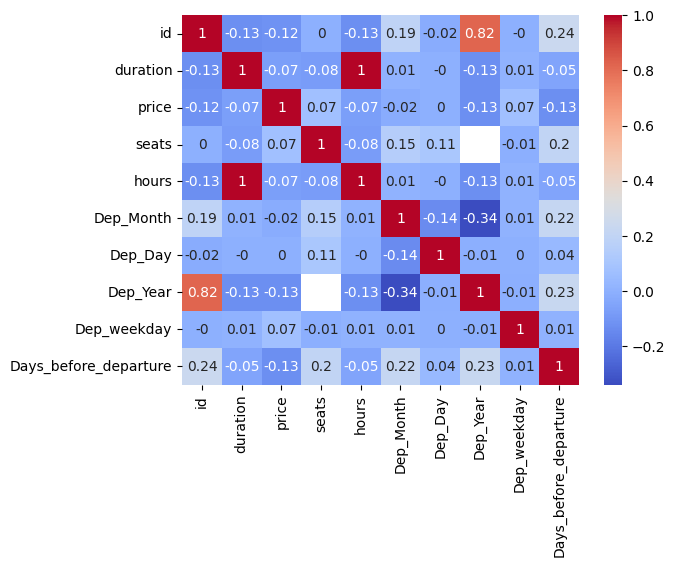

In [35]:
sns.heatmap(clean_df.select_dtypes(include=['int', 'float']).corr().round(2),annot=True, cmap='coolwarm')

C:\Users\manub\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


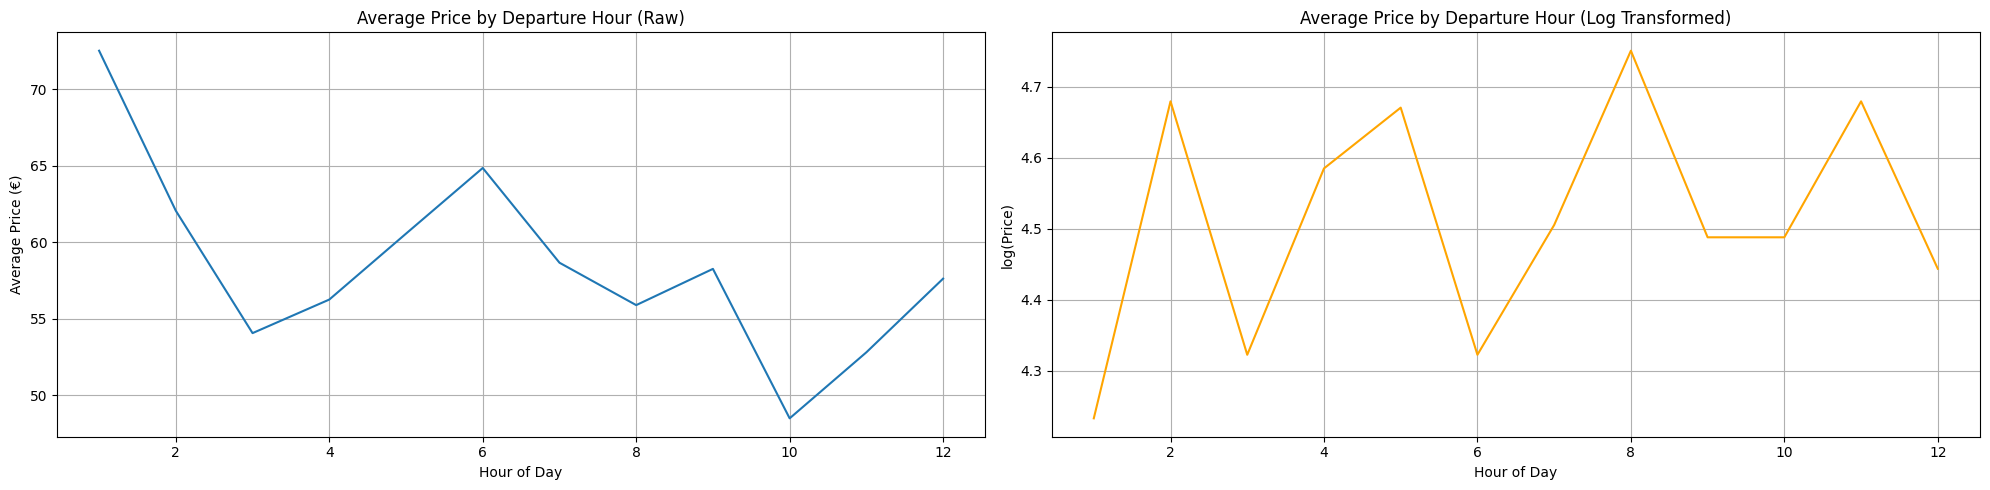

In [36]:
meanprice = clean_df.groupby('Dep_Month')['price'].mean().reset_index()
meanprice['log_price'] = np.log(meanprice['price'])



# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

# Plot 1: Raw Price
sns.lineplot(data=meanprice, x='Dep_Month', y='price', ax=axes[0])
axes[0].set_title("Average Price by Departure Hour (Raw)")
axes[0].set_ylabel("Average Price (€)")
axes[0].set_xlabel("Hour of Day")
axes[0].grid(True)

# Plot 2: Log Price
sns.lineplot(data=meanprice, x='Dep_Month', y=np.log(clean_df['price']), ax=axes[1], color='orange')
axes[1].set_title("Average Price by Departure Hour (Log Transformed)")
axes[1].set_ylabel("log(Price)")
axes[1].set_xlabel("Hour of Day")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [37]:
final_df = clean_df.drop(columns=['id', 'destination', 'origin', 'company', 'Dep_Year', 'insert_date','vehicle_type','meta','arrival', 'departure', 'Journey','seats'])

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:

encoder = OneHotEncoder(sparse_output=True, dtype='int8', handle_unknown='ignore')
encoded = encoder.fit_transform(final_df[['vehicle_class', 'fare', 'mapped_journey']]) 

In [41]:
encoded_cols = encoder.get_feature_names_out(['vehicle_class', 'fare', 'mapped_journey'])
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded, columns=encoded_cols,index=final_df.index)
final_df = final_df.drop(columns=['vehicle_class', 'fare', 'mapped_journey'])
final_df = pd.concat([final_df, encoded_df], axis=1)

In [42]:
final_df.head()

,duration,price,hours,Dep_Month,Dep_Day,Dep_weekday,Days_before_departure,vehicle_class_Cama G. Clase,vehicle_class_Cama Turista,vehicle_class_Preferente,...,mapped_journey_ZAMORA - MADRID - Preferente,mapped_journey_ZAMORA - MADRID - Turista,mapped_journey_ZARAGOZA - BARCELONA - Turista,mapped_journey_ZARAGOZA - BARCELONA - Turista Plus,mapped_journey_ZARAGOZA - MADRID - Preferente,mapped_journey_ZARAGOZA - MADRID - Turista,mapped_journey_ZARAGOZA - MADRID - Turista - Turista Plus,mapped_journey_ZARAGOZA - MADRID - Turista Plus,mapped_journey_ZARAGOZA - MADRID - Turista Plus - Turista,mapped_journey_ZARAGOZA - MADRID - Turista con enlace
0,3.08,68.95,3.083333,4,18,3,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2.98,107.70,2.983333,4,18,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.83,75.40,2.833333,4,18,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.17,98.00,3.166667,4,18,3,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.50,106.75,2.500000,4,18,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
final_df.shape

(30718821, 266)

In [44]:
final_df['Dep_weekday'].unique()

array([3, 5, 2, 0, 1, 6, 4])

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare features and target
X = final_df.drop(columns=['price'])
y = np.log(final_df['price'])

# Split into train and test (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, sample to avoid MemoryError
X_train_sample = X_train.sample(n=100000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Fit model on the sample
linreg = LinearRegression()
linreg.fit(X_train_sample, y_train_sample)

C:\Users\manub\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\manub\anaconda3\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LinearRegression()

In [46]:
r_squared = linreg.score(X_train_sample, y_train_sample)
residual = y_train_sample - linreg.predict(X_train_sample)
params = linreg.coef_
print("R squared:", r_squared)

c:\Users\manub\anaconda3\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\manub\anaconda3\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


R squared: 0.8097772418091866


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Predict with Linear Regression
linreg_preds = linreg.predict(X_train_sample)

# MAE and RMSE (in log units)
mae_linreg = mean_absolute_error(y_train_sample, linreg_preds)
rmse_linreg = np.sqrt(mean_squared_error(y_train_sample, linreg_preds))

# Approximate in price (if y was log-transformed)
mean_price = np.exp(y_train_sample).mean()
mae_linreg_price = mean_price * (np.exp(mae_linreg) - 1)
rmse_linreg_price = mean_price * (np.exp(rmse_linreg) - 1)

print("📘 Linear Regression:")
print(f"MAE (log): {mae_linreg:.4f}")
print(f"RMSE (log): {rmse_linreg:.4f}")
print(f"Approx. MAE (€): {mae_linreg_price:.2f}")
print(f"Approx. RMSE (€): {rmse_linreg_price:.2f}")

📘 Linear Regression:
MAE (log): 0.1391
RMSE (log): 0.1914
Approx. MAE (€): 8.68
Approx. RMSE (€): 12.26


c:\Users\manub\anaconda3\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [47]:
print(X_train_sample.shape)
print(y_train_sample.shape)
print(np.any(np.isnan(X_train_sample)))
print(np.any(np.isnan(y_train_sample)))
print(np.any(np.isinf(X_train_sample)))
print(np.any(np.isinf(y_train_sample)))

(100000, 265)
(100000,)
False
False
False
False


c:\Users\manub\anaconda3\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


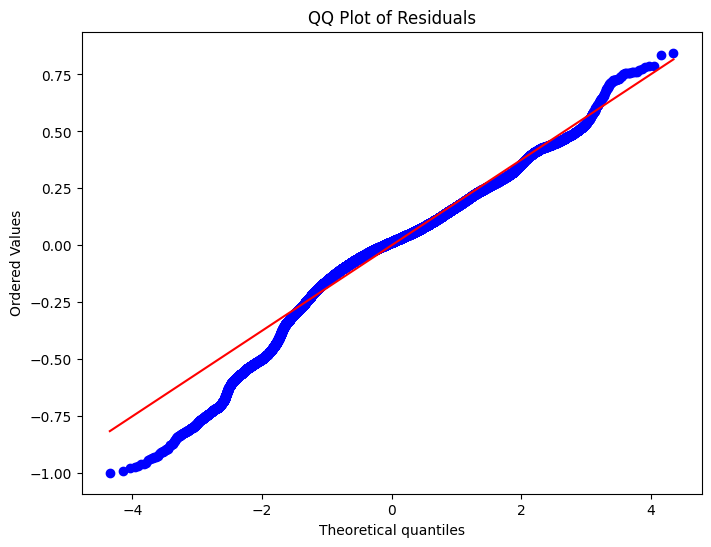

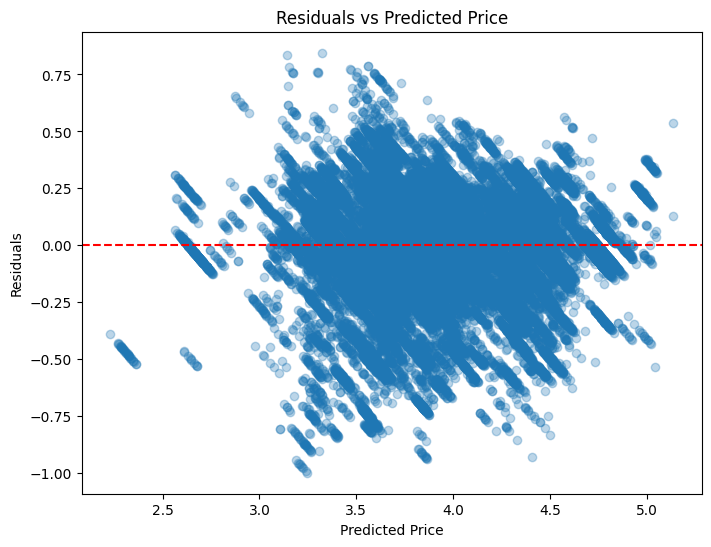

In [48]:
import scipy.stats as stats

# Predictions on the sample
y_pred = linreg.predict(X_train_sample)
residuals = y_train_sample - y_pred

# QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Price")
plt.show()

In [49]:
# Get absolute values of parameters and their corresponding feature names
param_scores = pd.Series(np.abs(params), index=X_train_sample.columns)
top_10 = param_scores.sort_values(ascending=False).head(10)
top_10

vehicle_class_Cama G. Clase                           2.255029e+08
fare_Individual-Flexible                              1.259927e+08
mapped_journey_MADRID - PONFERRADA - Cama G. Clase    6.343740e+07
mapped_journey_PONFERRADA - MADRID - Cama G. Clase    6.343740e+07
vehicle_class_Cama Turista                            3.471093e+07
vehicle_class_Turista con enlace                      2.972441e+07
vehicle_class_Turista Plus                            2.789225e+07
vehicle_class_Turista                                 2.739140e+07
vehicle_class_Preferente                              2.735025e+07
vehicle_class_TuristaSólo plaza H                     2.599610e+07
dtype: float64

In [50]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# Build a pipeline with XGBoost regressor
xgb_pipeline = Pipeline([
    ('xgbregressor', XGBRegressor(
        n_estimators=100,
        max_depth=9,
        learning_rate=0.2,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        n_jobs=-1,
        tree_method='hist'
    ))
])

# Fit on the same sample as before
xgb_pipeline.fit(X_train_sample, y_train_sample)
xgb_r2 = xgb_pipeline.score(X_train_sample, y_train_sample)
print("XGBoost R squared:", xgb_r2)

c:\Users\manub\anaconda3\Lib\site-packages\xgboost\data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


XGBoost R squared: 0.903501700289209


c:\Users\manub\anaconda3\Lib\site-packages\xgboost\data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


c:\Users\manub\anaconda3\Lib\site-packages\xgboost\data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")
c:\Users\manub\anaconda3\Lib\site-packages\xgboost\data.py:575: UserWarning: Sparse arrays from pandas are converted into dense.
  warnings.warn("Sparse arrays from pandas are converted into dense.")


XGBoost R squared: 0.903501700289209


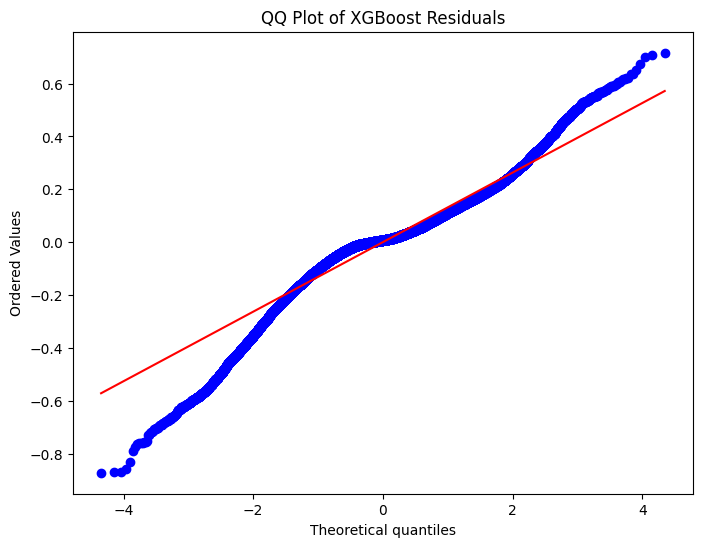

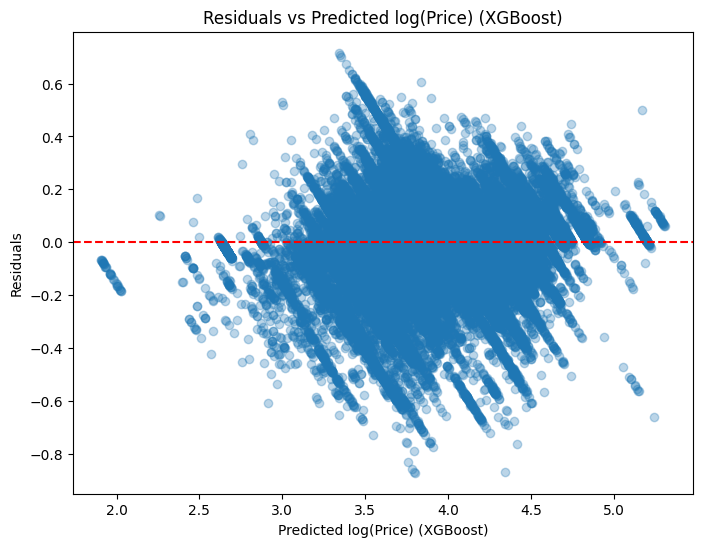

In [51]:
# R squared for XGBoost model
xgb_r2 = xgb_pipeline.score(X_train_sample, y_train_sample)
print("XGBoost R squared:", xgb_r2)

# Predictions and residuals
xgb_y_pred = xgb_pipeline.predict(X_train_sample)
xgb_residuals = y_train_sample - xgb_y_pred

# QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(xgb_residuals, dist="norm", plot=plt)
plt.title("QQ Plot of XGBoost Residuals")
plt.show()

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(xgb_y_pred, xgb_residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted log(Price) (XGBoost)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted log(Price) (XGBoost)")
plt.show()

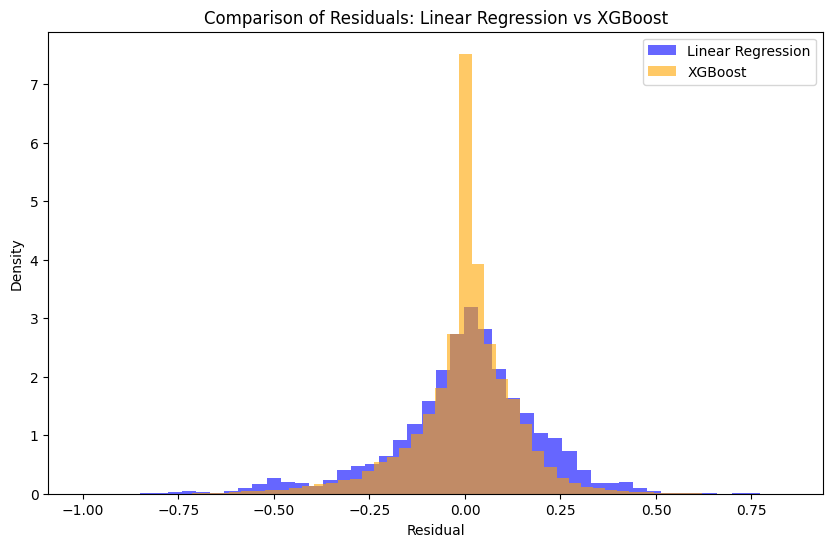

Linear Regression Residuals:
count    1.000000e+05
mean     8.422052e-09
std      1.913942e-01
min     -9.990302e-01
25%     -8.661395e-02
50%      1.418874e-02
75%      1.100355e-01
max      8.455446e-01
Name: price, dtype: float64

XGBoost Residuals:
count    100000.000000
mean         -0.000059
std           0.136319
min          -0.872687
25%          -0.046366
50%           0.007080
75%           0.066675
max           0.716681
Name: price, dtype: float64


In [52]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, alpha=0.6, label='Linear Regression', color='blue', density=True)
plt.hist(xgb_residuals, bins=50, alpha=0.6, label='XGBoost', color='orange', density=True)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Comparison of Residuals: Linear Regression vs XGBoost')
plt.legend()
plt.show()

print("Linear Regression Residuals:")
print(residuals.describe())
print("\nXGBoost Residuals:")
print(xgb_residuals.describe())

In [53]:
importances = xgb_pipeline.named_steps['xgbregressor'].feature_importances_
feature_names = X_train_sample.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feat_imp.head(20))

fare_Adulto ida                                          0.147060
vehicle_class_Turista Plus                               0.053530
mapped_journey_BARCELONA - MADRID - Turista              0.048823
mapped_journey_MADRID - BARCELONA - Turista              0.048225
mapped_journey_SEVILLA - MADRID - Turista                0.047635
mapped_journey_MADRID - SEVILLA - Turista                0.045279
vehicle_class_Turista con enlace                         0.036145
mapped_journey_GIRONA - MADRID - Turista con enlace      0.026847
vehicle_class_Turista                                    0.026118
vehicle_class_Preferente                                 0.024933
fare_Flexible                                            0.015917
mapped_journey_MADRID - GIRONA - Turista con enlace      0.014529
mapped_journey_MADRID - ZARAGOZA - Turista               0.014002
mapped_journey_ALBACETE - MADRID - Turista               0.013944
mapped_journey_MADRID - BARCELONA - Preferente           0.013424
mapped_jou

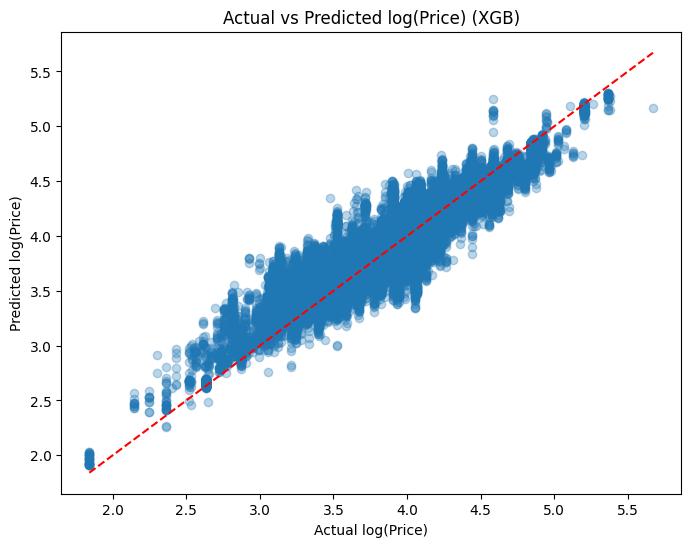

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_sample, xgb_y_pred, alpha=0.3)
plt.xlabel("Actual log(Price)")
plt.ylabel("Predicted log(Price)")
plt.title("Actual vs Predicted log(Price) (XGB)")
plt.plot([y_train_sample.min(), y_train_sample.max()], [y_train_sample.min(), y_train_sample.max()], 'r--')
plt.show()

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# MAE and RMSE
mae_xgb = mean_absolute_error(y_train_sample, xgb_y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_train_sample, xgb_y_pred))

# Approximate in price
mae_xgb_price = mean_price * (np.exp(mae_xgb) - 1)
rmse_xgb_price = mean_price * (np.exp(rmse_xgb) - 1)

print("🚀 XGBoost:")
print(f"MAE (log): {mae_xgb:.4f}")
print(f"RMSE (log): {rmse_xgb:.4f}")
print(f"Approx. MAE (€): {mae_xgb_price:.2f}")
print(f"Approx. RMSE (€): {rmse_xgb_price:.2f}")

🚀 XGBoost:
MAE (log): 0.0915
RMSE (log): 0.1363
Approx. MAE (€): 5.57
Approx. RMSE (€): 8.49


In [61]:
print("MAE:", mean_absolute_error(y_train_sample, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train_sample, y_pred)))

mean_price = np.exp(y_train_sample).mean()
mae_log = 0.0915
rmse_log = 0.1363

approx_mae_price = mean_price * (np.exp(mae_log) - 1)
approx_rmse_price = mean_price * (np.exp(rmse_log) - 1)

print("Approx. MAE in price:", approx_mae_price)
print("Approx. RMSE in price:", approx_rmse_price)

MAE: 0.13911784437668137
RMSE: 0.19139328870081546
Approx. MAE in price: 5.569939389685589
Approx. RMSE in price: 8.488638904132909


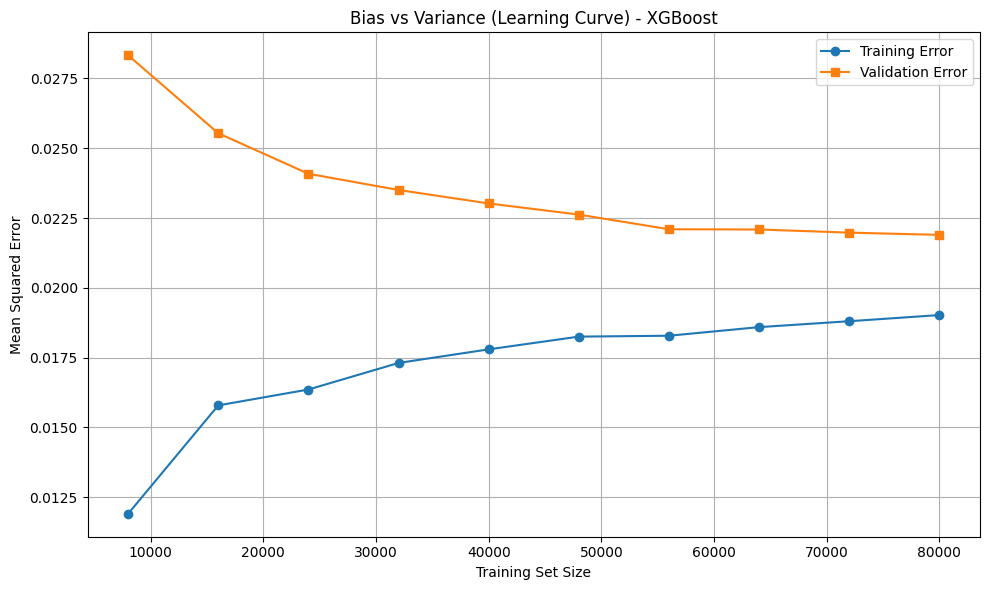

In [59]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Use log-transformed target if you're already doing that
y = y_train_sample
X = X_train_sample

# Define training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Get learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=xgb_pipeline,
    X=X,
    y=y,
    train_sizes=train_sizes,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Convert negative MSE to positive
train_errors = -np.mean(train_scores, axis=1)
val_errors = -np.mean(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training Error', marker='o')
plt.plot(train_sizes, val_errors, label='Validation Error', marker='s')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Bias vs Variance (Learning Curve) - XGBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
# Example using IQR for 'price'
Q1 = final_df['price'].quantile(0.25)
Q3 = final_df['price'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = final_df[(final_df['price'] >= Q1 - 1.5 * IQR) & (final_df['price'] <= Q3 + 1.5 * IQR)]
filtered_df.head()

,duration,price,hours,Dep_Month,Dep_Day,Dep_weekday,Days_before_departure,vehicle_class_Cama G. Clase,vehicle_class_Cama Turista,vehicle_class_Preferente,...,mapped_journey_ZAMORA - MADRID - Preferente,mapped_journey_ZAMORA - MADRID - Turista,mapped_journey_ZARAGOZA - BARCELONA - Turista,mapped_journey_ZARAGOZA - BARCELONA - Turista Plus,mapped_journey_ZARAGOZA - MADRID - Preferente,mapped_journey_ZARAGOZA - MADRID - Turista,mapped_journey_ZARAGOZA - MADRID - Turista - Turista Plus,mapped_journey_ZARAGOZA - MADRID - Turista Plus,mapped_journey_ZARAGOZA - MADRID - Turista Plus - Turista,mapped_journey_ZARAGOZA - MADRID - Turista con enlace
0,3.08,68.95,3.083333,4,18,3,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2.98,107.70,2.983333,4,18,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.83,75.40,2.833333,4,18,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.17,98.00,3.166667,4,18,3,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.50,106.75,2.500000,4,18,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
